In [1]:
# Import packages we'll need later on in this tutorial
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math

# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA 

In [2]:
# If you're just starting out, this should only have "default" in it.
# Else, you'll see all the previous projects you've worked on.

bd.projects

Brightway2 projects manager with 9 objects:
	Assorted bellpepers
	Assorted pineapples
	Mango
	Mixed veggies :)
	RA - Ofir & Stine
	RA - Ofir & Stine 1
	RA - Rune
	RA - copy
	default
Use `projects.report()` to get a report on all projects.

In [3]:
# Your name variable should be the name of the project.

name = "RA - Ofir & Stine 1"
bd.projects.set_current(name)

In [4]:
bd.projects.dir

'C:\\Users\\ruw\\AppData\\Local\\pylca\\Brightway3\\RA-Ofir-Stine-1.f6415da22c370aad3b4b860fb280820d'

In [5]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 10 object(s):
	APOS EcoInevnt
	Ananas
	Ananas consq
	Consq EcoInvent
	Lobster APOS
	Lobster consq
	Ofir consq
	Ofir consq1
	Stine consq - updated
	biosphere3

In [6]:
# If this is the first time you've set up the project, you need to install the biosphere flows.
# You do not need to run this subsequent times.

bi.bw2setup() ## THIS YIELDS AN ERROR AT THE MOMENT

Biosphere database already present!!! No setup is needed


In [7]:
eidb = bd.Database("Ananas consq")
print("The imported ecoinvent database is of type {} and has a length of {}.".format(type(eidb), len(eidb)))


The imported ecoinvent database is of type <class 'bw2data.backends.peewee.database.SQLiteBackend'> and has a length of 38.


In [8]:
for process in eidb:
    print(process)


'transport Alu - APOS' (unit, GLO, None)
'transport Alu - CONSQ' (unit, GLO, None)
'treatment of metal scrap, mixed, for recycling, unsorted, sorting' (kilogram, Europe without Switzerland, None)
'energy avoided electricity from energy recovery - CONSQ' (kilowatt hour, GLO, None)
'PP sheet sc3 - APOS' (unit, GLO, None)
'heat production hot water tank DK electricity grid - APOS' (megajoule, GLO, None)
'PP sheet sc3 - CONSQ' (unit, GLO, None)
'alubox production - CONSQ' (unit, GLO, None)
'autoclave - CONSQ' (unit, GLO, None)
'autoclave - APOS' (unit, GLO, None)
'alubox - CONSQ' (unit, GLO, None)
'treatment of metal scrap, mixed, for recycling, unsorted, sorting' (kilogram, Europe without Switzerland, None)
'alubox raw materials - APOS' (unit, GLO, None)
'PP incineration no Energy Recovery - CONSQ' (kilogram, CH, None)
'marginal heating grid projection updated - CONSQ' (megajoule, GLO, None)
'pp production - CONSQ' (unit, GLO, None)
'alubox - APOS' (unit, GLO, None)
'alubox EoL mixed sort

In [9]:
# process_name = "PP sheet sc2"
process_names = ["alubox - CONSQ",
                 "PP sheet sc2 - CONSQ",
                "PP sheet sc3 - CONSQ",
                "alubox - APOS", 
                 "PP sheet sc2 - APOS",
                 "PP sheet sc3 - APOS"]
matches = [0] * len(process_names)
for p in range(len(process_names)):
    matches[p] = [act for act in eidb if process_names[p].lower() in act['name'].lower()]

# Select the first match (or whichever is most appropriate)
if matches:
    selected_process = matches  # If there are multiple matches, you can choose another index
    print("Selected process:",len(matches))
else:
    print("No process found with the name:", process_names)

matches

Selected process: 6


[['alubox - CONSQ' (unit, GLO, None)],
 ['PP sheet sc2 - CONSQ' (unit, GLO, None)],
 ['PP sheet sc3 - CONSQ' (unit, GLO, None)],
 ['alubox - APOS' (unit, GLO, None)],
 ['PP sheet sc2 - APOS' (unit, GLO, None)],
 ['PP sheet sc3 - APOS' (unit, GLO, None)]]

In [10]:
list(bw.methods)

#or use the built-in method
#bw.methods.list

#or the following
#bw.methods.items()

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'energy resources: non-renewable no LT',
  'abiotic depletion potential (ADP): fossil fuels no LT'),
 ('CML v4.8 2016 no LT',
  'eutrophication no LT',
  'eutrophication (fate not incl.) no LT'),
 ('CML v4.8 2016 no LT',
  'human toxicity no LT',
  'human toxicity (HTP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'material resources: metals/minerals no LT',
  'abiotic depletion potential (ADP): elements (ultimate reserves) no LT')

In [11]:
# List all methods containing 'EF v3.1 EN15804'
all_methods = [m for m in bw.methods if 'EF v3.1 EN15804' in str(m)]

# Filter out methods that contain "climate change:" in method[1]
filtered_methods = [method for method in all_methods if "climate change:" not in method[1]]

# Print the methods that were removed
removed_methods = [method[1] for method in all_methods if "climate change:" in method[1]]
print("Removed methods:")
for rm in removed_methods:
    print(rm)

# Optional: Check the length of the filtered list
print(f"Total number of methods after filtering: {len(filtered_methods)}")



Removed methods:
climate change: biogenic
climate change: fossil
climate change: land use and land use change
Total number of methods after filtering: 16


In [12]:
plot_x_axis = [0] * len(filtered_methods)
for i in range(len(plot_x_axis)):
    plot_x_axis[i] = filtered_methods[i][1]
    print(filtered_methods[i][1])


acidification
climate change
ecotoxicity: freshwater
energy resources: non-renewable
eutrophication: freshwater
eutrophication: marine
eutrophication: terrestrial
human toxicity: carcinogenic
human toxicity: non-carcinogenic
ionising radiation: human health
land use
material resources: metals/minerals
ozone depletion
particulate matter formation
photochemical oxidant formation: human health
water use


In [13]:
FU = [0] * len(matches)
for i in range(len(matches)):
    FU[i] = {matches[i][0]:1}

FU

[{'alubox - CONSQ' (unit, GLO, None): 1},
 {'PP sheet sc2 - CONSQ' (unit, GLO, None): 1},
 {'PP sheet sc3 - CONSQ' (unit, GLO, None): 1},
 {'alubox - APOS' (unit, GLO, None): 1},
 {'PP sheet sc2 - APOS' (unit, GLO, None): 1},
 {'PP sheet sc3 - APOS' (unit, GLO, None): 1}]

In [14]:
# Define the dimensions
n = len(process_names)  # number of rows
m = len(filtered_methods) # number of columns

# Create a DataFrame with random data
df = pd.DataFrame(np.random.rand(n, m), index=process_names, columns=[filtered_methods])


In [47]:
calc_count = 1
for impact in range(m):
    for idx in range(n):
        fu = FU[idx]
        cat = filtered_methods[impact]
        lca = bw.LCA(fu, cat)
        lca.lci()
        lca.lcia()
        df.iat[idx, impact] = lca.score
        print(f"Calculation {calc_count} of {m*n}", fu, cat, lca.score)
        calc_count +=1

df.head(6)

Calculation 1 of 96 {'alubox - CONSQ' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.004922893889409339
Calculation 2 of 96 {'PP sheet sc2 - CONSQ' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.003172334439956092
Calculation 3 of 96 {'PP sheet sc3 - CONSQ' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.003039065518142625
Calculation 4 of 96 {'alubox - APOS' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.004707938931420408
Calculation 5 of 96 {'PP sheet sc2 - APOS' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.0038025820645541534
Calculation 6 of 96 {'PP sheet sc3 - APOS' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'acidification', 'accumulated exceedance (AE)') 0.003997930806032982
Calculation 7 of 96 {'alubox - CONSQ' (unit, GLO, None): 1} ('EF v3.1 EN15804', 'cli

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
alubox - CONSQ,0.004923,0.559010,5.051109,6.938314,0.000376,0.001650,0.016071,1.592912e-09,2.202626e-08,0.000669,86.020749,0.000012,1.136082e-08,6.275015e-08,0.003814,0.246376
PP sheet sc2 - CONSQ,0.003172,0.719398,2.572323,15.837593,0.000102,0.001006,0.011142,5.148379e-10,1.006923e-08,-0.001999,37.454918,0.000009,-2.139090e-09,3.247871e-08,0.003280,0.191978
PP sheet sc3 - CONSQ,0.003039,0.561010,2.549206,13.032374,0.000103,0.000996,0.011136,5.438502e-10,1.039122e-08,0.001382,41.362147,0.000009,3.524538e-09,3.376495e-08,0.003165,0.163861
alubox - APOS,0.004708,1.502969,6.081212,18.470169,0.001009,0.001687,0.012305,1.089312e-09,1.860470e-08,0.346278,22.609597,0.000006,2.624891e-08,4.068301e-08,0.003157,0.831915
PP sheet sc2 - APOS,0.003803,1.116170,3.551434,20.284357,0.000411,0.001100,0.010083,3.894016e-10,8.614737e-09,0.142188,4.613616,0.000003,-6.242828e-09,2.576587e-08,0.003104,0.473208
PP sheet sc3 - APOS,0.003998,1.156194,3.641348,20.133453,0.000452,0.001194,0.011097,5.032751e-10,1.042484e-08,0.170048,10.410503,0.000004,1.237105e-08,3.477493e-08,0.003402,0.484683


In [48]:
# determining the name of the file
file_name = r'C:\Users\ruw\Desktop\RA\Results\Ananas.xlsx'
sheet_name = 'Ananas'
# creating an ExcelWriter object
with pd.ExcelWriter(file_name) as writer:
    # writing to the 'Employee' sheet
    df.to_excel(writer, sheet_name=sheet_name, index=True)
print('DataFrames are written to Excel File successfully.')

DataFrames are written to Excel File successfully.


In [49]:
df_cols = df.columns
df_cols = df_cols.to_list()


In [50]:

df_norm = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
df_sens = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
for i in df_cols:
    scaling_factor = max(abs(df[i]))
    for j in range(len(df[df_cols[0]])):
        df_norm[i][j] =df[i][j]/scaling_factor

        if df_norm[i][0] < df_norm[i][1] or df_norm[i][0] < df_norm[i][2]:
            df_sens[i][0] = df_norm[i][0]
            df_sens[i][1] = df_norm[i][1]
            df_sens[i][2] = df_norm[i][2]
        if df_norm[i][3] < df_norm[i][4] or df_norm[i][3] < df_norm[i][5]:
            df_sens[i][3] = df_norm[i][3]
            df_sens[i][4] = df_norm[i][4]
            df_sens[i][5] = df_norm[i][5]
        else:
            df_sens[i][j] = 0
        #print(scaling_factor, i)
# for j in range(len(data['Index'])):
#     df_norm['Index'][j] = df['Index'][j]


# Selecting the columns from 1th column onwards
columns_to_plot = df_norm.columns
df_sens.head(6)

C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57676\3028210393.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm[i][j] =df[i][j]/scaling_factor
C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57676\3028210393.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
alubox - CONSQ,0.0,0.371937,0.0,0.342052,0.0,0.0,0.0,0.0,0.0,0.001933,0.0,0.0,0.0,0.0,0.000000,0.0
PP sheet sc2 - CONSQ,0.0,0.478652,0.0,0.780779,0.0,0.0,0.0,0.0,0.0,-0.005773,0.0,0.0,0.0,0.0,0.000000,0.0
PP sheet sc3 - CONSQ,0.0,0.373268,0.0,0.642484,0.0,0.0,0.0,0.0,0.0,0.003991,0.0,0.0,0.0,0.0,0.000000,0.0
alubox - APOS,0.0,0.000000,0.0,0.910562,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.827937,0.0
PP sheet sc2 - APOS,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.813974,0.0
PP sheet sc3 - APOS,0.0,0.000000,0.0,0.992561,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.892112,0.0


In [51]:
# cmap = plt.get_cmap('tab20b')
# colors = [cmap(i) for i in np.linspace(0, 1, 20)]

colors = ["#789D4A",
          "#E07E3C",
          "#7A6040",
          "#E1BBB4",
          "#D05A57",
          "#F2C75C",
          "#DDCBA4",
          "#AEB862",
          "#000000"]

In [52]:
index_list = list(df.index.values)
index_list

['alubox - CONSQ',
 'PP sheet sc2 - CONSQ',
 'PP sheet sc3 - CONSQ',
 'alubox - APOS',
 'PP sheet sc2 - APOS',
 'PP sheet sc3 - APOS']

In [53]:
# f = columns_to_plot[1]

In [54]:
print(len(columns_to_plot),len(filtered_methods))

16 16


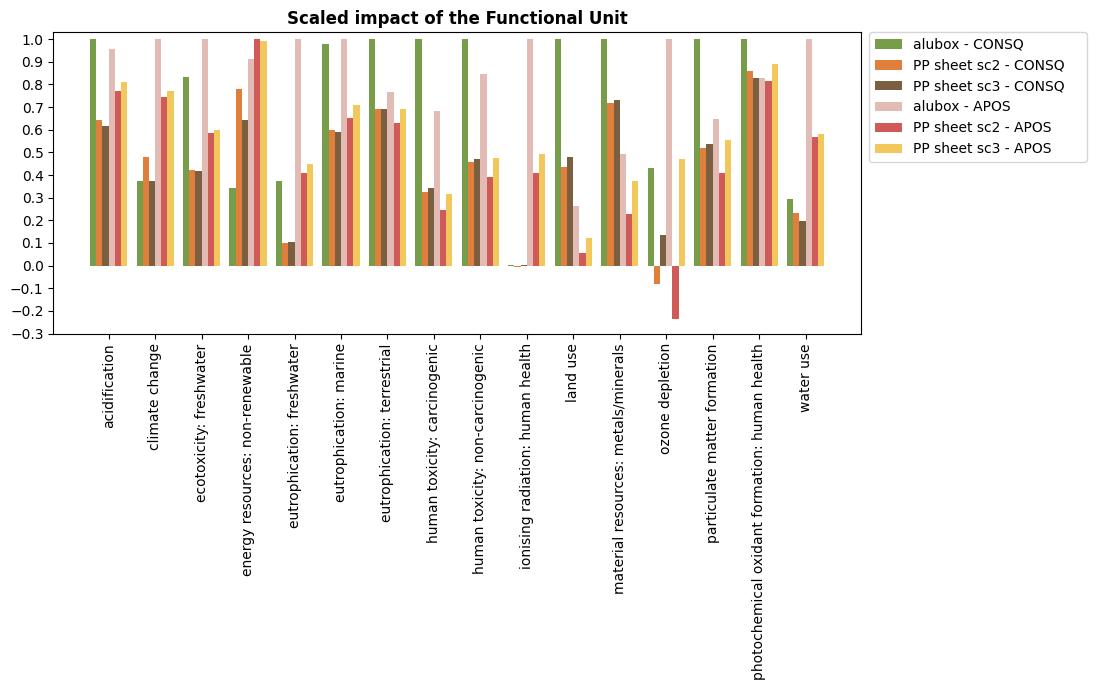

In [55]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))



count = 3

# Plotting each group of bars
for i, process in enumerate(df_norm.index):
    values = df_norm.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])
    count += 3
    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(-.3, 1.01, step=0.1))
plt.ylim(-.3,1.03)

ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

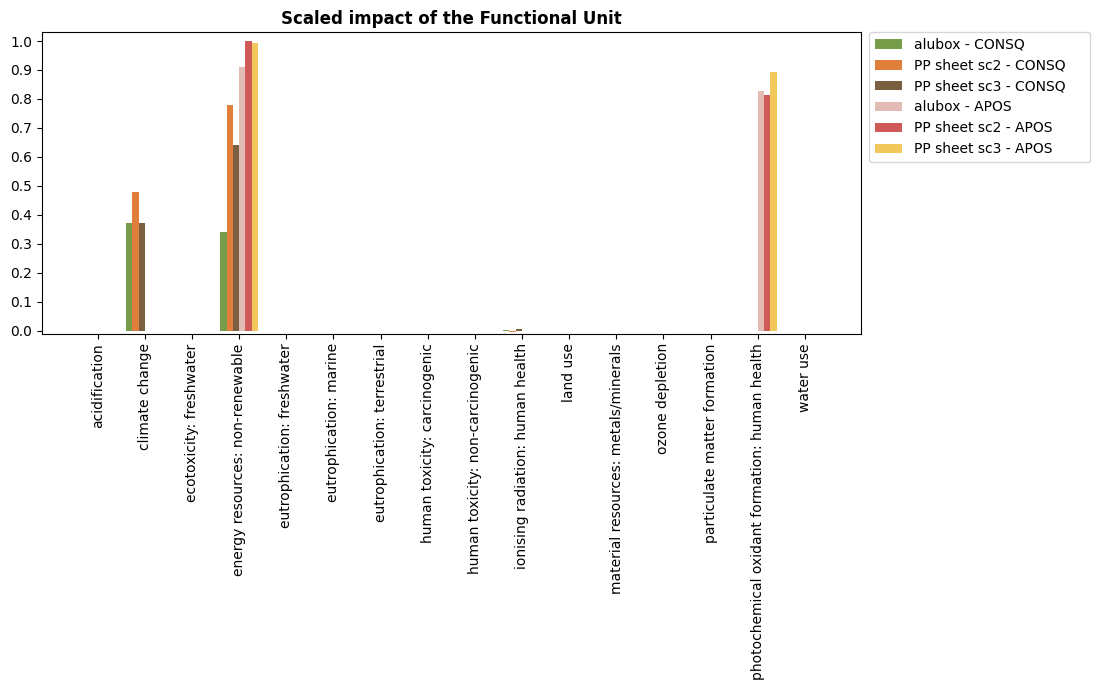

In [56]:
# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_sens)
bar_width = 1/(len(index_list) + 1.5) 
index = np.arange(len(columns_to_plot))



count = 3

# Plotting each group of bars
for i, process in enumerate(df_sens.index):
    values = df_sens.loc[process, columns_to_plot].values
    ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])
    count += 3
    

# Setting labels and title
ax.set_title('Scaled impact of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(plot_x_axis)
plt.xticks(rotation=90)
plt.yticks(np.arange(-.3, 1.01, step=0.1))
plt.ylim(-.01,1.03)

ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [57]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations - Copy\LCIA FU_.xlsx'

sheet2 = 'Norm + Weigh'

data_NW = pd.read_excel(file, sheet_name=sheet2)


In [58]:
norm_lst = data_NW['Normalization']
weigh_lst = data_NW['Weighting'].to_list
print(len(data_NW['Normalization']))

norm_lst = [0]*(len(data_NW['Normalization']))
weigh_lst = [0]*(len(data_NW['Weighting']))

for i in range(len(data_NW['Normalization'])):
    norm_lst[i] = data_NW['Normalization'][i]
    weigh_lst[i] = data_NW['Weighting'][i]



16


In [59]:
norm_df = pd.DataFrame().reindex_like(df) #https://stackoverflow.com/questions/23195250/create-empty-dataframe-with-same-dimensions-as-another
weigh_df = pd.DataFrame().reindex_like(df)

counter = 0
for i in df_cols:
    for j in range(len(df[df_cols[0]])):
        norm_df[i][j] =df[i][j] * norm_lst[counter]
        weigh_df[i][j] =norm_df[i][j] * weigh_lst[counter]
        #print(i, norm_df[i][j], weigh_df[i][j])
    counter +=1

lst = [0] * len(weigh_df[df_cols[0]])
for j in range(len(weigh_df[df_cols[0]])):
    for i in df_cols:
        lst[j] += weigh_df[i][j]
        #print(i,j)



C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57676\2599739618.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm_df[i][j] =df[i][j] * norm_lst[counter]
C:\Users\ruw\AppData\Local\Temp\2\ipykernel_57676\2599739618.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assi

In [60]:
lst_scaled = [0] * len(lst)
lst_max = max(lst)


for n in range(len(lst)):
    lst_scaled[n] = lst[n]/lst_max

lst_scaled

[0.679115222245794,
 0.5929836965503155,
 0.5339307138041629,
 1.0,
 0.7105605606159788,
 0.7680658928590802]

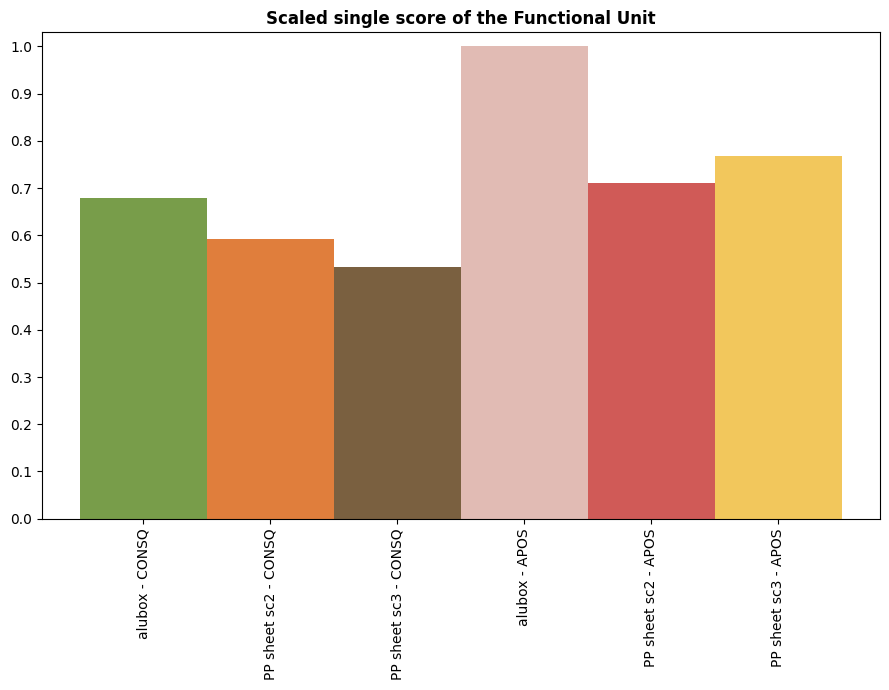

In [61]:


# Plotting
fig, ax = plt.subplots(figsize=(9,7))

num_processes = len(df_norm)
bar_width = 1/(len(index_list)-5) 
index = np.arange(len(index_list))


# # Plotting each group of bars
# for i, process in enumerate(df_norm.index):
#     values = df_norm.loc[process, columns_to_plot].values
#     ax.bar((index + i * bar_width)-0.2, values, bar_width, label=process, color=colors[i])

# for j in range(len(lst_scaled)):
#     ax.bar((index + j * bar_width), lst_scaled[j], bar_width, label=index_list[j], color=colors[j])
   

ax.bar(index + bar_width, lst_scaled, bar_width, label=index_list, color=colors)

# Setting labels and title
ax.set_title('Scaled single score of the Functional Unit',weight='bold')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(index_list)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0,1.03)

# ax.legend(index_list,bbox_to_anchor=(1.01, .57, .27, 0), loc="lower left",
#             mode="expand", borderaxespad=0,  ncol=1)
plt.tight_layout()
# plt.savefig(os.path.join(save_dir, img_res), bbox_inches='tight')
plt.show()

In [62]:
ca = bwa.ContributionAnalysis()
ca.annotated_top_processes(lca, limit=5) #returns a list of tuples: (lca score, supply amount, activity name)

[(0.2063599443572291,
  0.16442264898385156,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None)),
 (0.04454404597279578,
  0.09930846129500873,
  'propylene production' (kilogram, RoW, None)),
 (0.029455641306877854,
  0.023469300927631765,
  'electricity production, hydro, reservoir, non-alpine region' (kilowatt hour, SE, None)),
 (0.01269078739181261,
  0.10237496621528996,
  'polypropylene production, granulate' (kilogram, RoW, None)),
 (0.010696692301656235,
  0.023849540869873693,
  'propylene production' (kilogram, RER, None))]

In [63]:
lca.top_activities() #this command essentially relies on the annotated_top_process command from above. Hence, the output is given as (lca score, supply amount, activity name)

[(0.2063599443572291,
  0.16442264898385156,
  'electricity production, hydro, reservoir, alpine region' (kilowatt hour, NO, None)),
 (0.04454404597279578,
  0.09930846129500873,
  'propylene production' (kilogram, RoW, None)),
 (0.029455641306877854,
  0.023469300927631765,
  'electricity production, hydro, reservoir, non-alpine region' (kilowatt hour, SE, None)),
 (0.01269078739181261,
  0.10237496621528996,
  'polypropylene production, granulate' (kilogram, RoW, None)),
 (0.010696692301656235,
  0.023849540869873693,
  'propylene production' (kilogram, RER, None)),
 (0.009992986357536695,
  0.0793071548512863,
  'electricity production, nuclear, boiling water reactor' (kilowatt hour, SE, None)),
 (0.008014448389873642,
  0.20159837657534918,
  'heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014' (kilowatt hour, DK, None)),
 (0.006636927891430805,
  0.04631752297567125,
  'methanol production' (kilogram, GLO, None)),
 (0.006318527635626569,
  0.01402009876822483

In [64]:
# If this is your first time using this BW25 project, this should be an empty dictionary! 
bd.databases

Databases dictionary with 10 object(s):
	APOS EcoInevnt
	Ananas
	Ananas consq
	Consq EcoInvent
	Lobster APOS
	Lobster consq
	Ofir consq
	Ofir consq1
	Stine consq - updated
	biosphere3